In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
all_data = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
all_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
all_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


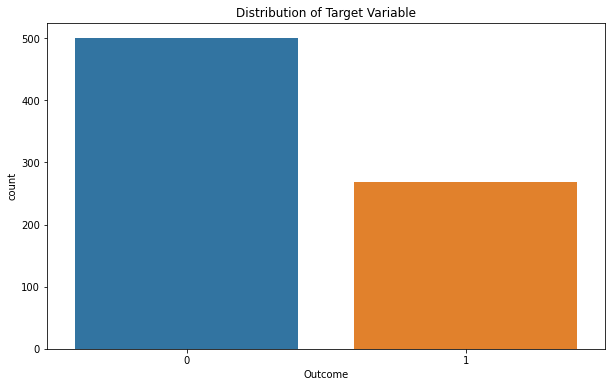

In [4]:
plt.figure(figsize = (10,6))
sns.countplot('Outcome',data=all_data).set_title('Distribution of Target Variable')
plt.show()

The Outcome coumn has a lot of '0 Outcomes'.The target variable(Outcome) has an imbalanced distribution of independent variables. This might influence the performance of our model negatively.

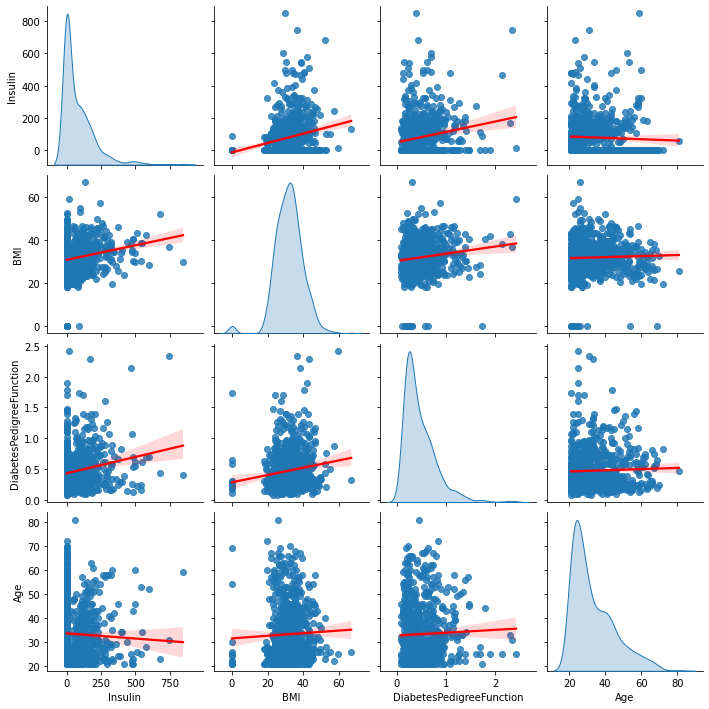

In [5]:
sns.pairplot(all_data[['Insulin','BMI','DiabetesPedigreeFunction', 'Age']],diag_kind='kde',kind='reg',plot_kws={'line_kws':{'color':'red'}})

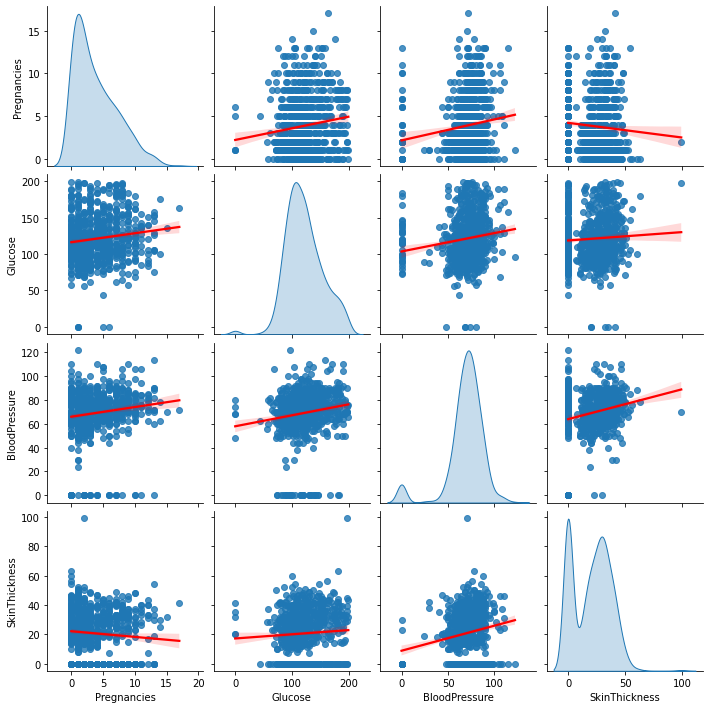

In [6]:
sns.pairplot(all_data[['Pregnancies','Glucose','BloodPressure', 'SkinThickness']],diag_kind='kde',kind='reg',plot_kws={'line_kws':{'color':'red'}})

In [7]:
# Examining the missing values 
features = np.array(all_data.columns[0:-1])
features

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [8]:
# getting an idea about the values in each of the features
for feature in features:
    print(all_data[feature].describe())
    print('\n')

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64


count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64


count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64


count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64


count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64


count    768.000000
mean

The columns Glucose, BloodPressure, SkinThickness, Insulin, BMI have some 0 values which might have a negative impact on our model and might skew the results.

In [9]:
# removing outiers 

z_scores = np.abs(stats.zscore(all_data))
all_data = all_data[(z_scores < 4).all(axis=1)]
all_data.shape


(743, 9)

In [10]:
X = all_data[features]
scaler = StandardScaler()
columns = np.array(all_data.keys())

scaledX = scaler.fit_transform(X)
all_data[features] = scaledX
all_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.632055,0.878860,0.130667,0.945601,-0.743292,0.193469,0.556739,1.462402,1
1,-0.851259,-1.118836,-0.196956,0.558823,-0.743292,-0.849801,-0.366677,-0.187460,0
2,1.225381,1.988691,-0.306163,-1.310601,-0.743292,-1.341628,0.707296,-0.100626,1
3,-0.851259,-0.991998,-0.196956,0.172046,0.186665,-0.626243,-0.982288,-1.055809,0
5,0.335393,-0.135843,0.239875,-1.310601,-0.743292,-0.998840,-0.868534,-0.274295,0
...,...,...,...,...,...,...,...,...,...
763,1.818707,-0.611485,0.349082,1.783619,1.037478,0.089142,-0.968905,2.591255,0
764,-0.554596,0.054414,0.021459,0.429897,-0.743292,0.670393,-0.403480,-0.534800,0
765,0.335393,0.022704,0.130667,0.172046,0.364742,-0.909416,-0.721323,-0.274295,0
766,-0.851259,0.181252,-0.524579,-1.310601,-0.743292,-0.328166,-0.373369,1.201897,1


In [11]:
X = all_data[features]
y = all_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 14)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((520, 8), (223, 8), (520,), (223,))

In [12]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [13]:
prediction_probabilities1 = classifier.predict_proba(X_test)[::,1]
auc1 = roc_auc_score(y_test,prediction_probabilities1)

In [14]:
print('Evaluation metrics for the KNN classifier')
print('Precision:',precision_score(y_test, y_pred))
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Recall:',recall_score(y_test, y_pred))
print('roc auc:',auc1)
print('F1:',f1_score(y_pred, y_test))

Evaluation metrics for the KNN classifier
Precision: 0.6875
Accuracy: 0.7533632286995515
Recall: 0.5569620253164557
roc auc: 0.7841068917018283
F1: 0.6153846153846154


In [15]:
# finding the optimal value of k using grid search cross validation 

param_grid = {'n_neighbors':np.arange(1,40)}

knn= GridSearchCV(classifier,param_grid,cv=5,scoring='roc_auc')
knn.fit(X_train,y_train)
knn.best_params_


{'n_neighbors': 35}

In [16]:
optimal_classifier = KNeighborsClassifier(n_neighbors=35, metric='minkowski')
optimal_classifier.fit(X_train, y_train)
y_pred_ = optimal_classifier.predict(X_test)

In [17]:
prediction_probabilities2 = optimal_classifier.predict_proba(X_test)[::,1]
auc2 = roc_auc_score(y_test,prediction_probabilities2)
auc2

0.8415963431786218

In [18]:
print('Evaluation metrics for the KNN classifier with k=35')
print('Precision:',precision_score(y_test, y_pred_))
print('Accuracy:',accuracy_score(y_test, y_pred_))
print('Recall:',recall_score(y_test, y_pred_))
print('roc auc:',auc2)
print('F1:',f1_score(y_pred_, y_test))

Evaluation metrics for the KNN classifier with k=35
Precision: 0.85
Accuracy: 0.7713004484304933
Recall: 0.43037974683544306
roc auc: 0.8415963431786218
F1: 0.5714285714285715


k=35 doesnt seem to give us an optimal model, infact it performs worse than the model with k=5.
It would be a good idea to plot the error for models for different values of k.

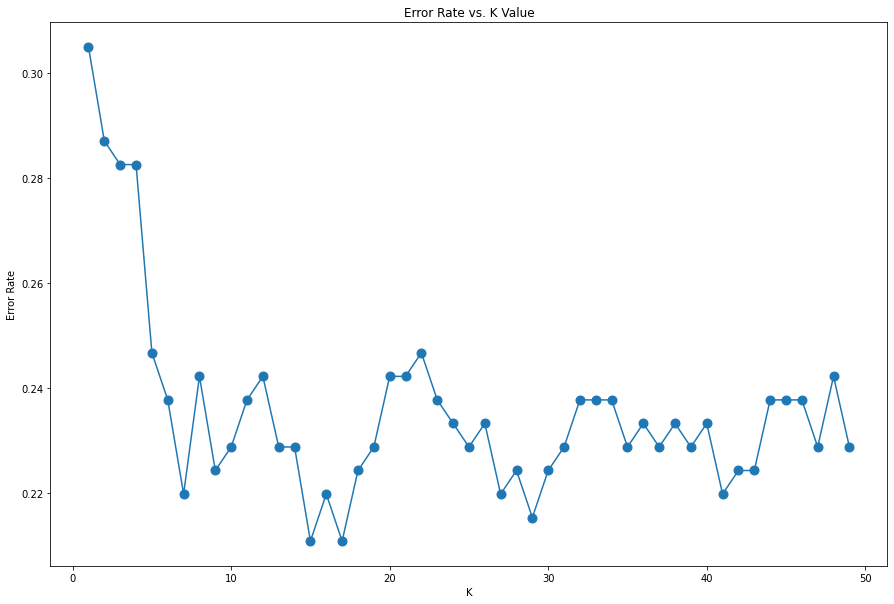

In [19]:

error_rates = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rates.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rates, marker='o', markersize=9)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

The minimum error rate that we get is for k=15. Lets choose the value of k to train a new classifier and see how it performs.

In [20]:
# Training another classifier with k=15 

k15_classifier = KNeighborsClassifier(n_neighbors=15)
k15_classifier.fit(X_train, y_train)
pred3 = k15_classifier.predict(X_test)

In [21]:
prediction_probabilities3 = k15_classifier.predict_proba(X_test)[::,1]
auc3 = roc_auc_score(y_test,prediction_probabilities3)


In [22]:
print('Evaluation metrics for the KNN classifier with k=15\n')
print('Precision:',precision_score(y_test, pred3))
print('Accuracy:',accuracy_score(y_test, pred3))
print('Recall:',recall_score(y_test, pred3))
print('roc auc:',auc3)
print('F1:',f1_score(y_test,pred3))

Evaluation metrics for the KNN classifier with k=15

Precision: 0.8076923076923077
Accuracy: 0.7892376681614349
Recall: 0.5316455696202531
roc auc: 0.8288502109704641
F1: 0.6412213740458015


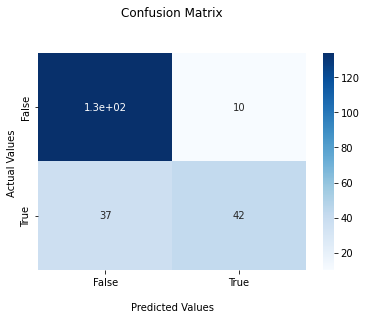

In [23]:
# display the confusion matrix

conf_matrix = confusion_matrix(y_test,pred3)

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

As seen from the confusion matrix, there are a lot of false negatives which does mean that there are a lot of instances where our model predicted a '0 outcome' but the actual value was '1'. This makes our model unreliable especially when it is related to medical conditions where frequent errors like these might have severe consequences.

**Comparision with the Logistic Regression model**
---
**PRECISION**

The precision of the logistic regression model was 0.66. The KNN model with k=15 does have a better precision than the logistic regression model. KNN classifier is the better model based strictly on the precisions of the two.

**ACCURACY**

The accuracy of the logistic regression model was 0.79 and the accuracy of the KNN classifier is 0.77. It is somewhat close but the logistic regression model definitely outperforms the KNN classifier and would be a better model in terms of Accuracy.

**RECALL**

The recall for the logistic regression model was 0.62. The recall for the KNN classifier is way lower and logistic regression model is way better.

**ROC AUC**

The ROC AUC of the logistic regression model was 0.86 which is clearly much better than the KNN classifier. The ROC AUC of our KNN classifier with k=15 is 0.68. 


**F1 SCORE**

The F1 of the logistic regression model was 0.65 while it is considerably lesser for the KNN classifier making the logistic regression model much better in terms of this metric.